In [1]:
import pandas as pd
from io import StringIO
import operator

columns = ['id', 'year', 'month', 'element', *[str(i).zfill(2) for i in range (1, 32)]]

with open('../OriginalData/weather.txt') as weathertxt, open('../OriginalData/Metadata/weather.csv', 'w') as weathercsv:
    csv = []
    for line in weathertxt.readlines():
        newline = line[:11] + ', ' + line[11:15] + ',' +  line[15:17] + ',' + line[17:21] + ', ' + line[21:].strip('\n')
        newline = newline.replace('S', ',')
        newline = newline.replace('I ', ', ')
        newline = newline.replace(' I', '')
        newline = newline.replace('-9999', ',')
        newline.strip(',')
        csv.append(newline)

    csv = '\n'.join(csv)
    weathercsv.write(csv)

In [2]:
df = pd.read_csv(StringIO(csv), header=None, sep=',', error_bad_lines=False, warn_bad_lines=False, names=columns)

In [3]:
df = pd.melt(df, id_vars=['id', 'year', 'month', 'element'], value_vars=[str(i) .zfill(2) for i in range (1, 32)])

In [4]:
df['year'] = df['year'].astype(str) + '-'
df['month'] = df['month'].astype(str) + '-'  
df['month'] = df['month'].apply(lambda x: '{0:0>3}'.format(x))
df['date'] = df['year'] + df['month'] + df['variable']
df.drop('year', axis=1, inplace=True)
df.drop('month', axis=1, inplace=True)
df.drop('variable', axis=1, inplace=True)

In [5]:
pd.options.mode.chained_assignment = None
lookup = df.drop_duplicates('date')
lookup.drop('element', axis=1, inplace=True)
lookup.drop('value', axis=1, inplace=True)
lookup.set_index(['date'], inplace=True, drop=False)

In [6]:
df = df.pivot(columns='element', values='value', index='date')
df = df.join(lookup)

In [7]:
df = df.reset_index(drop=True)
df.sort_values(by=["date"], inplace=True)

In [8]:
cols = ['id', 'date', 'PRCP', 'TMIN', 'TMAX']
df = df[cols]

In [9]:
df.to_csv('../AnalysisData/tidy.csv', sep=',', index=False)

In [10]:
df.describe()

,id,date,PRCP,TMIN,TMAX
count,18197,18197,17162,16233,16109
unique,1,18197,734,412,476
top,MX000017004,1993-05-15,0,,
freq,18197,1,9760,4067,4642


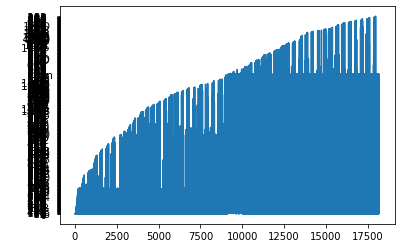

In [14]:
import matplotlib.pyplot as plt

prcp = df['PRCP'].astype(str)
plt.plot(prcp)

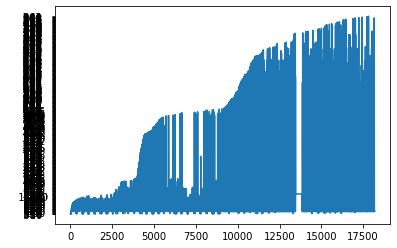

In [15]:
tmax = df['TMAX'].astype(str)
plt.plot(tmax)

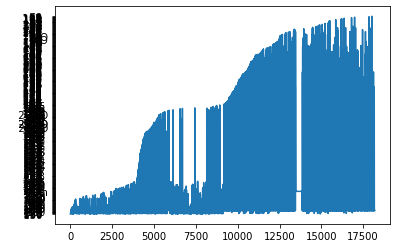

In [16]:
tmin = df['TMIN'].astype(str)
plt.plot(tmin)